In [28]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

# Regression import
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import accuracy_score

# Configure code auto-completion
%config Completer.use_jedi = False

# Set working directory
os.chdir('/notebooks/ml project/')

In [29]:
data = pd.read_csv("new_csv.csv") 

In [30]:
# Define the feature vector by non-feature columns
x = (data.drop(["name", "album", "popularity"], axis=1))

# Define the label 
y = data["popularity"]

In [31]:
# Splitting the dataset into training (60%), validation (20%), and testing (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=28)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=28)

In [32]:
n_and_mses = {}

for n in range(20, 500, 10):
    # Initializing the Random Forest Regression model
    model = RandomForestRegressor(n_estimators=n, random_state=0, max_depth= 5)

    # Fitting the Random Forest Regression model to the training data
    model.fit(x_train, y_train)

    # Predicting the target values of the validation set
    y_pred = model.predict(x_val)

    # MSE ( Mean Square Error) on the validation set
    mse = float(format(mean_squared_error(y_val, y_pred), '.3f'))
    n_and_mses[n] = mse
    print("\nMSE: ", mse, "for n=", n)


MSE:  106.459 for n= 20

MSE:  108.115 for n= 30

MSE:  108.844 for n= 40

MSE:  107.531 for n= 50

MSE:  107.716 for n= 60

MSE:  107.354 for n= 70

MSE:  106.873 for n= 80

MSE:  106.696 for n= 90

MSE:  106.493 for n= 100

MSE:  105.786 for n= 110

MSE:  105.669 for n= 120

MSE:  105.954 for n= 130

MSE:  105.699 for n= 140

MSE:  105.975 for n= 150

MSE:  105.991 for n= 160

MSE:  106.121 for n= 170

MSE:  106.28 for n= 180

MSE:  106.632 for n= 190

MSE:  106.372 for n= 200

MSE:  106.032 for n= 210

MSE:  105.931 for n= 220

MSE:  105.885 for n= 230

MSE:  106.046 for n= 240

MSE:  105.841 for n= 250

MSE:  106.058 for n= 260

MSE:  106.103 for n= 270

MSE:  105.951 for n= 280

MSE:  105.934 for n= 290

MSE:  105.911 for n= 300

MSE:  105.741 for n= 310

MSE:  105.801 for n= 320

MSE:  105.885 for n= 330

MSE:  105.873 for n= 340

MSE:  105.879 for n= 350

MSE:  105.802 for n= 360

MSE:  105.701 for n= 370

MSE:  105.666 for n= 380

MSE:  105.784 for n= 390

MSE:  105.918 for n=

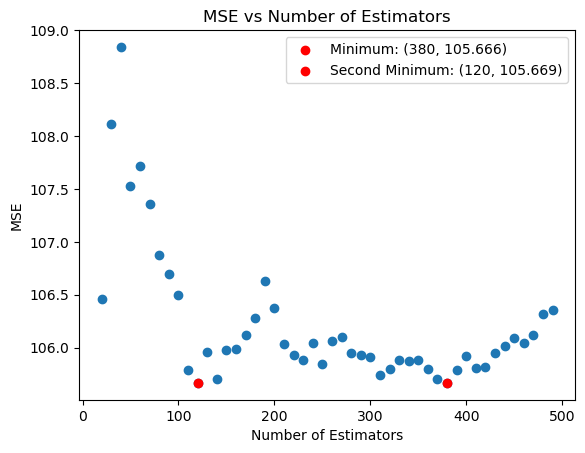

Minimum MSE: 105.666 at Number of Estimators = 380
Second Minimum MSE: 105.669 at Number of Estimators = 120


In [33]:
import matplotlib.pyplot as plt


# Extract keys and values from the dictionary
x_cord = list(n_and_mses.keys())
y_cord = list(n_and_mses.values())

# Find the minimum and second minimum MSE values along with their corresponding number of estimators
sorted_indices = sorted(range(len(y_cord)), key=lambda k: y_cord[k])
min_mse_idx, second_min_mse_idx = sorted_indices[:2]
min_mse = y_cord[min_mse_idx]
min_estimators = x_cord[min_mse_idx]
second_min_mse = y_cord[second_min_mse_idx]
second_min_estimators = x_cord[second_min_mse_idx]

# Create a scatter plot
plt.scatter(x_cord, y_cord)

# Highlight the minimum and second minimum points
plt.scatter(min_estimators, min_mse, color='red', label=f'Minimum: ({min_estimators}, {min_mse})')
plt.scatter(second_min_estimators, second_min_mse, color='red', label=f'Second Minimum: ({second_min_estimators}, {second_min_mse})')


# Set plot labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('MSE vs Number of Estimators')

# Show the plot with legend
plt.legend()
plt.show()

print(f"Minimum MSE: {min_mse} at Number of Estimators = {min_estimators}")
print(f"Second Minimum MSE: {second_min_mse} at Number of Estimators = {second_min_estimators}")


In [34]:

# Initializing the Random Forest Regression model with n_estimators as 120, as it was found to have the lowest MSE among the validation data
model = RandomForestRegressor(n_estimators=120, random_state=0, max_depth= 5)

# Fitting the Random Forest Regression model to the training data
model.fit(x_train, y_train)

# Predicting the target values of the validation set
y_pred = model.predict(x_test)

# MSE ( Mean Square Error) on the validation set
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
n_and_mses[n] = mse
print("\nMean squared error for testing dataset:", mse)


Mean squared error for testing dataset: 109.795
